In [1]:
##### A1 #####
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
file_path = "D:\Sem 5\projects\ML\main.csv"
data = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classification model (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Predictions on test data
y_test_pred = model.predict(X_test)

# Evaluate on training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Evaluate on test data
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print results
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("\nTraining Classification Report:")
print(train_classification_report)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)
print("\nTest Classification Report:")
print(test_classification_report)

# Analysis for overfitting/underfitting:
def analyze_model(train_report, test_report):
    print("\n--- Model Analysis ---")
    train_f1 = float(train_report.split()[-2])
    test_f1 = float(test_report.split()[-2])
    
    if test_f1 < train_f1 and test_f1 < 0.6:
        print("Model is likely underfitting the data.")
    elif test_f1 < train_f1:
        print("Model might be overfitting the data.")
    else:
        print("Model seems to be fitting well (regular fit).")

analyze_model(train_classification_report, test_classification_report)

Training Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]

Training Classification Report:
                                                                                                  precision    recall  f1-score   support

UMLS:C0001175_acquired immuno-deficiency syndrome^UMLS:C0019682_HIV^UMLS:C0019693_hiv infections       1.00      1.00      1.00         1
                                                                    UMLS:C0001418_adenocarcinoma       1.00      1.00      1.00         1
                                                                          UMLS:C0001511_adhesion       1.00      1.00      1.00         1
                                                    UMLS:C0001973_chronic alcoholic intoxication       1.00      1.00      1.00         1
                                                               UMLS:C0002395_Alzheimer's disease       1.00      1.00      1.00  

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Load the Excel file
file_path = r"C:\Users\venka\Downloads\Lab Session Data.xlsx"
df1 = pd.read_excel(file_path)

# Assuming the sheet contains columns 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)'
X = df1[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df1['Payment (Rs)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"R2 Score: {r2:.4f}")


MSE: 0.00
RMSE: 0.00
MAPE: 0.00%
R2 Score: 1.0000


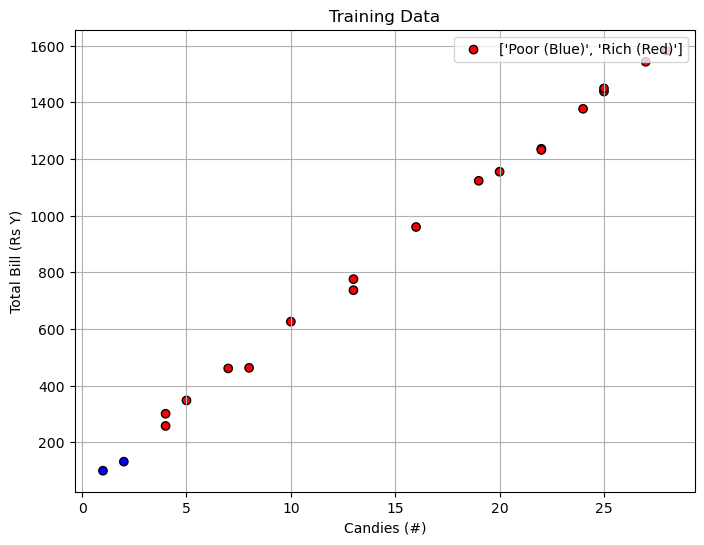

In [9]:
### A3 ###

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Set random seed for reproducibility
np.random.seed(0)

# Given unit prices
price_candies = 55
price_mangoes = 1
price_milk_packets = 18

# Function to calculate total bill and classify as 'rich' or 'poor'
def calculate_total_bill(X1, X2, X3):
    return X1 * price_candies + X2 * price_mangoes + X3 * price_milk_packets

# Task A3: Generate Training Data
n_points = 20
X1_train = np.random.randint(1, 30, size=n_points)  # Candies (#)
X2_train = np.random.randint(1, 10, size=n_points)  # Mangoes (Kg)
X3_train = np.random.randint(1, 5, size=n_points)   # Milk Packets (#)
Y_train = calculate_total_bill(X1_train, X2_train, X3_train)
y_train = np.where(Y_train > 200, 1, 0)  # 1 for 'rich' (Y > 200), 0 for 'poor' (Y <= 200)

# Plot training data
colors = np.where(y_train == 0, 'blue', 'red')
plt.figure(figsize=(8, 6))
plt.scatter(X1_train, Y_train, c=colors, marker='o', edgecolors='k', label=['Poor (Blue)', 'Rich (Red)'])
plt.title('Training Data')
plt.xlabel('Candies (#)')
plt.ylabel('Total Bill (Rs Y)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

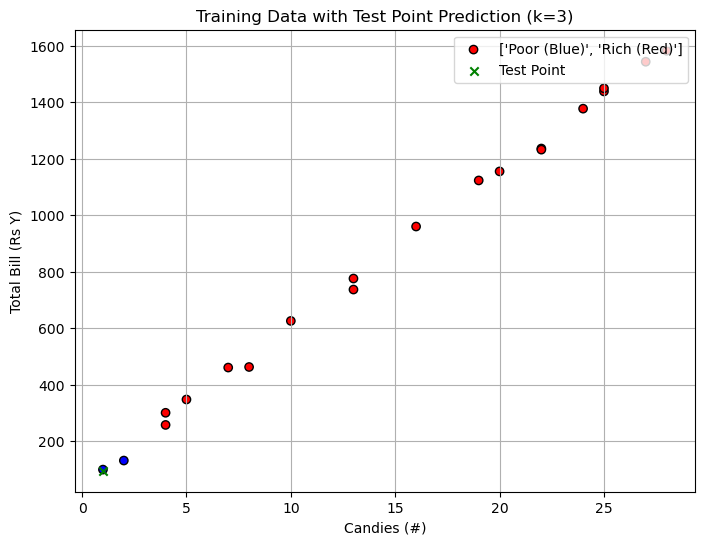

Test point is classified as Poor (Blue)


In [11]:
### A4 ###

from sklearn.neighbors import KNeighborsClassifier


X1_test = np.random.randint(1, 30)   
X2_test = np.random.randint(1, 10)   
X3_test = np.random.randint(1, 5)    
Y_test = calculate_total_bill(X1_test, X2_test, X3_test)
test_point = np.array([[X1_test, X2_test, X3_test]])

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
X_train_full = np.column_stack((X1_train, X2_train, X3_train))
knn.fit(X_train_full, y_train)

y_pred = knn.predict(test_point)

plt.figure(figsize=(8, 6))
plt.scatter(X1_train, Y_train, c=colors, marker='o', edgecolors='k', label=['Poor (Blue)', 'Rich (Red)'])
plt.scatter(X1_test, Y_test, c='green', marker='x', label='Test Point')
plt.title(f'Training Data with Test Point Prediction (k={k})')
plt.xlabel('Candies (#)')
plt.ylabel('Total Bill (Rs Y)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

if y_pred == 0:
    print(f'Test point is classified as Poor (Blue)')
else:
    print(f'Test point is classified as Rich (Red)')

In [13]:
### A5 ###
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare the training data
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'ANV': [1, 1, 1, 0, 1, 0, 0, 0, 0, 0]  # Assuming ANV is a binary classification column
}

df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df[['Candies', 'Mangoes']].values
y = df['ANV'].values  # Assuming 'ANV' is the target variable for classification

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# List of k values to evaluate
k_values = [1, 3, 5, 7, 9]

# Loop through each k value, train the model, and calculate metrics
results = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)
    
    results.append({
        'k': k,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Print the results
print("k | Accuracy | Precision | Recall | F1 Score")
print("--|----------|-----------|--------|----------")
for result in results:
    print(f"{result['k']} | {result['accuracy']:.2f}     | {result['precision']:.2f}     | {result['recall']:.2f}  | {result['f1_score']:.2f}")

k | Accuracy | Precision | Recall | F1 Score
--|----------|-----------|--------|----------
1 | 1.00     | 1.00     | 1.00  | 1.00
3 | 0.90     | 1.00     | 0.75  | 0.86
5 | 0.90     | 1.00     | 0.75  | 0.86
7 | 0.80     | 1.00     | 0.50  | 0.67
9 | 0.60     | 0.00     | 0.00  | 0.00


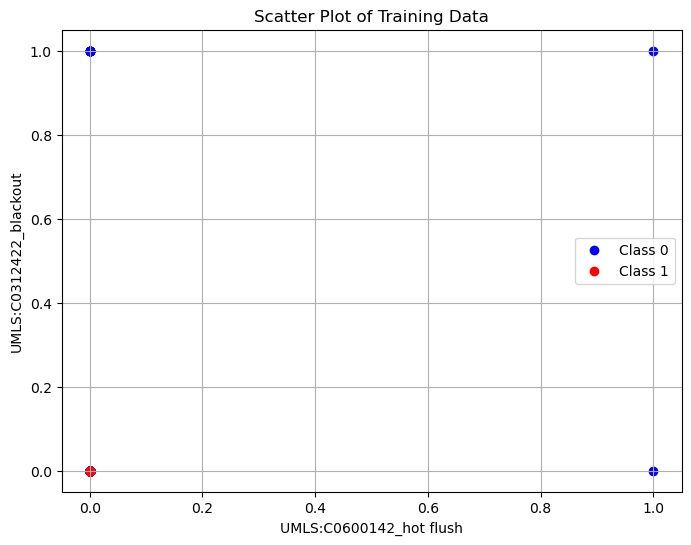

In [15]:
### A6 ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("D:\Sem 5\projects\ML\main.csv")  # Load your dataset

# Select two features and two classes (modify feature names and class labels as per your dataset)
feature1 = 'UMLS:C0600142_hot flush'  # Replace with your feature name
feature2 = 'UMLS:C0312422_blackout'  # Replace with your feature name
class_column = 'UMLS:C0457096_yellow sputum'  # Replace with your class column name
# Filter the data to contain only two classes
df = df[df[class_column].isin([0, 1])]  # Assuming classes are labeled 0 and 1

# Extract features and classes
X = df[[feature1, feature2]].values
y = df[class_column].values

# Create a scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()

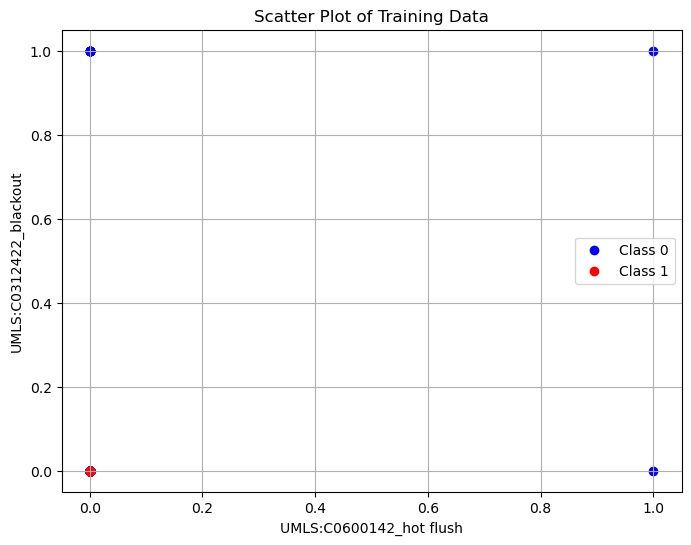

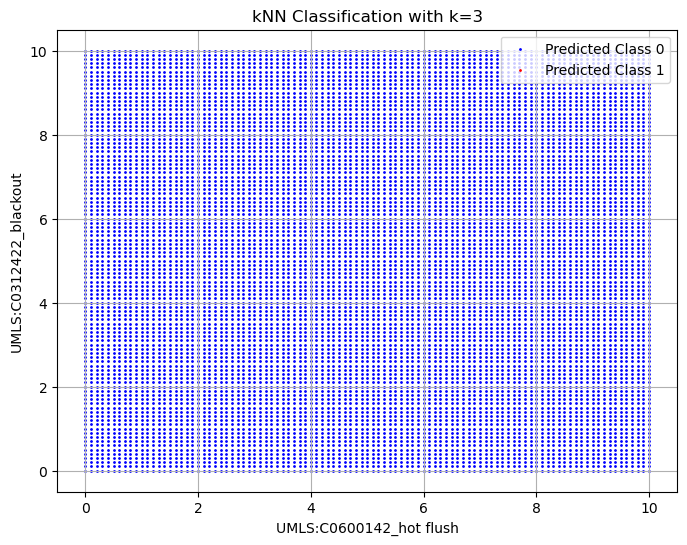

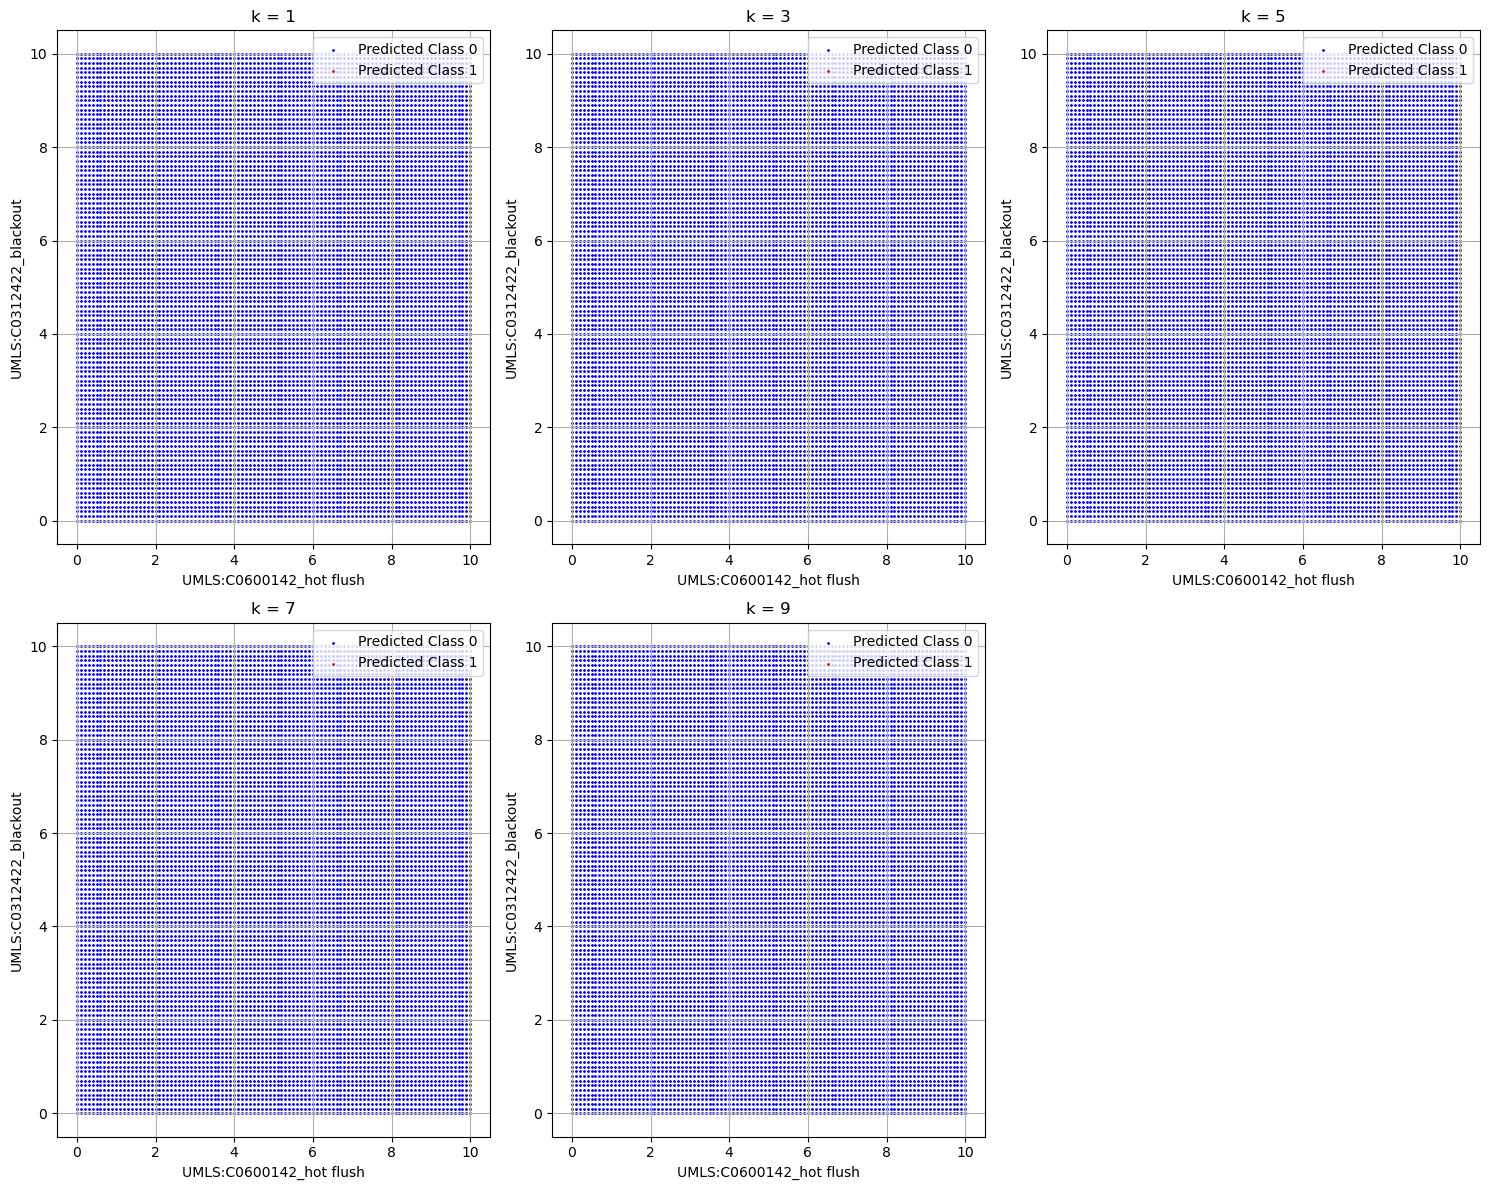

In [17]:
### A6 continue
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("D:\Sem 5\projects\ML\main.csv")  # Load your dataset

# Select two features and two classes (modify feature names and class labels as per your dataset)
feature1 = 'UMLS:C0600142_hot flush'  # Replace with your feature name
feature2 = 'UMLS:C0312422_blackout'  # Replace with your feature name
class_column = 'UMLS:C0457096_yellow sputum'  # Replace with your class column name

# Filter the data to contain only two classes
df = df[df[class_column].isin([0, 1])]  # Assuming classes are labeled 0 and 1

# Extract features and classes
X = df[[feature1, feature2]].values
y = df[class_column].values

# Create a scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()

#A4
from sklearn.neighbors import KNeighborsClassifier

# Generate test data
x_test_range = np.arange(0, 10.1, 0.1)
y_test_range = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_range, y_test_range)
X_test_flat = X_test.flatten()
Y_test_flat = Y_test.flatten()
test_data = np.column_stack((X_test_flat, Y_test_flat))

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Predict the classes of the test data
test_classes_pred = knn.predict(test_data)

# Scatter plot of the test data colored by predicted class
plt.figure(figsize=(8, 6))
plt.scatter(X_test_flat[test_classes_pred == 0], Y_test_flat[test_classes_pred == 0], 
            color='blue', s=1, label='Predicted Class 0')
plt.scatter(X_test_flat[test_classes_pred == 1], Y_test_flat[test_classes_pred == 1], 
            color='red', s=1, label='Predicted Class 1')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('kNN Classification with k=3')
plt.legend()
plt.grid(True)
plt.show()

#A5
# Define a list of k values to test
k_values = [1, 3, 5, 7, 9]

# Plotting the class boundaries for each k value
plt.figure(figsize=(15, 12))
for idx, k in enumerate(k_values, start=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Predict the classes of the test data
    test_classes_pred = knn.predict(test_data)
    
    # Create a subplot for each k value
    plt.subplot(2, 3, idx)
    plt.scatter(X_test_flat[test_classes_pred == 0], Y_test_flat[test_classes_pred == 0], 
                color='blue', s=1, label='Predicted Class 0')
    plt.scatter(X_test_flat[test_classes_pred == 1], Y_test_flat[test_classes_pred == 1], 
                color='red', s=1, label='Predicted Class 1')
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'k = {k}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
### A7 ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("D:\Sem 5\projects\ML\main.csv")  # Load your dataset

# Select two features and two classes (modify feature names and class labels as per your dataset)
feature1 = 'UMLS:C0600142_hot flush'  # Replace with your feature name
feature2 = 'UMLS:C0312422_blackout'  # Replace with your feature name
class_column = 'UMLS:C0457096_yellow sputum'  # Replace with your class column name

# Check if columns exist
if feature1 not in df.columns or feature2 not in df.columns or class_column not in df.columns:
    print("Error: One or more columns not found in the dataset.")
else:
    # Filter the data to contain only two classes
    df = df[df[class_column].isin([0, 1])]  # Assuming classes are labeled 0 and 1

    # Extract features and classes
    X = df[[feature1, feature2]].values
    y = df[class_column].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define the parameter grid for 'k'
    param_grid = {'n_neighbors': list(range(1, 31))}

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameter (k) and evaluate the model
    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k value: {best_k}")

    # Train the kNN classifier with the best k
    best_knn = KNeighborsClassifier(n_neighbors=best_k)
    best_knn.fit(X_train, y_train)

    # Evaluate the model
    y_pred_train = best_knn.predict(X_train)
    y_pred_test = best_knn.predict(X_test)

    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

    print("\nClassification Report for Training Data:")
    print(classification_report(y_train, y_pred_train))

    print("\nClassification Report for Test Data:")
    print(classification_report(y_test, y_pred_test))

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best k value: 2
Training Accuracy: 0.967741935483871
Test Accuracy: 0.926829268292683

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       0.00      0.00      0.00         3

    accuracy                           0.97        93
   macro avg       0.48      0.50      0.49        93
weighted avg       0.94      0.97      0.95        93


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       0.00      0.00      0.00         3

    accuracy                           0.93        41
   macro avg       0.46      0.50      0.48        41
weighted avg       0.86      0.93      0.89        41



C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metr